In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv("06-04-2021-results.csv")

In [54]:
data.columns

Index(['Unnamed: 0', 'acc_train', 'acc_test', 'epsilon', 'batch_size',
       'hidden_size', 'aux_loss_activated', 'EPS1', 'n'],
      dtype='object')

In [65]:
data_aux = data[(data.aux_loss_activated==True) & (data.batch_size>64) & (data.n>5000)]

In [66]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n
53,53,99,90,0.1,128,150,True,0.01000,100000
50,50,99,89,0.1,128,150,True,0.00100,100000
74,74,99,89,0.1,256,150,True,0.00100,100000
77,77,99,89,0.1,256,150,True,0.01000,100000
80,80,99,89,0.1,256,150,True,0.00010,100000
83,83,99,89,0.1,256,150,True,0.00001,100000
59,59,99,88,0.1,128,150,True,0.00001,100000
56,56,99,86,0.1,128,150,True,0.00010,100000
79,79,99,85,0.1,256,150,True,0.00010,10000
82,82,99,85,0.1,256,150,True,0.00001,10000


In [67]:
data_non_aux = data[(data.aux_loss_activated==False) & (data.batch_size>64) & (data.n>5000)]
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n
65,65,99,89,0.1,128,150,False,0.01000,100000
71,71,99,89,0.1,128,150,False,0.00001,100000
86,86,99,89,0.1,256,150,False,0.00100,100000
62,62,99,88,0.1,128,150,False,0.00100,100000
68,68,99,88,0.1,128,150,False,0.00010,100000
61,61,99,85,0.1,128,150,False,0.00100,10000
67,67,99,85,0.1,128,150,False,0.00010,10000
64,64,99,84,0.1,128,150,False,0.01000,10000
70,70,99,83,0.1,128,150,False,0.00001,10000
85,85,99,83,0.1,256,150,False,0.00100,10000


In [68]:
np.round(data_aux.acc_train.mean(),2), np.round(data_aux.acc_test.mean(),2)

(99.0, 85.75)

In [69]:
data_non_aux.acc_train.mean(), data_non_aux.acc_test.mean()

(99.0, 86.0)

In [41]:
data_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n
0,0,99,81,0.1,32,150,True,0.00100,5000
3,3,99,81,0.1,32,150,True,0.01000,5000
6,6,100,84,0.1,32,150,True,0.00010,5000
9,9,100,80,0.1,32,150,True,0.00001,5000
24,24,99,83,0.1,64,150,True,0.00100,5000


In [42]:
data_non_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n
12,12,99,81,0.1,32,150,False,0.00100,5000
15,15,99,79,0.1,32,150,False,0.01000,5000
18,18,100,79,0.1,32,150,False,0.00010,5000
21,21,99,80,0.1,32,150,False,0.00001,5000
36,36,99,81,0.1,64,150,False,0.00100,5000


In [43]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

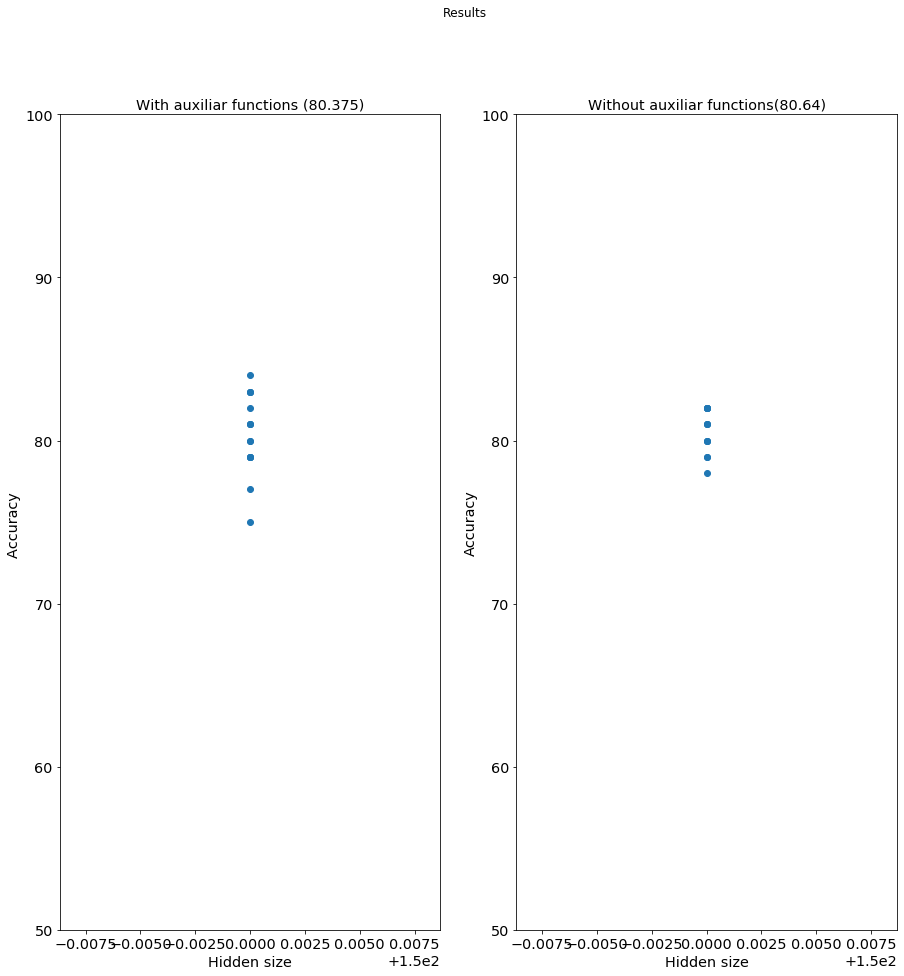

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.hidden_size, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.hidden_size, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('Hidden size')
ax2.set_xlabel('Hidden size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

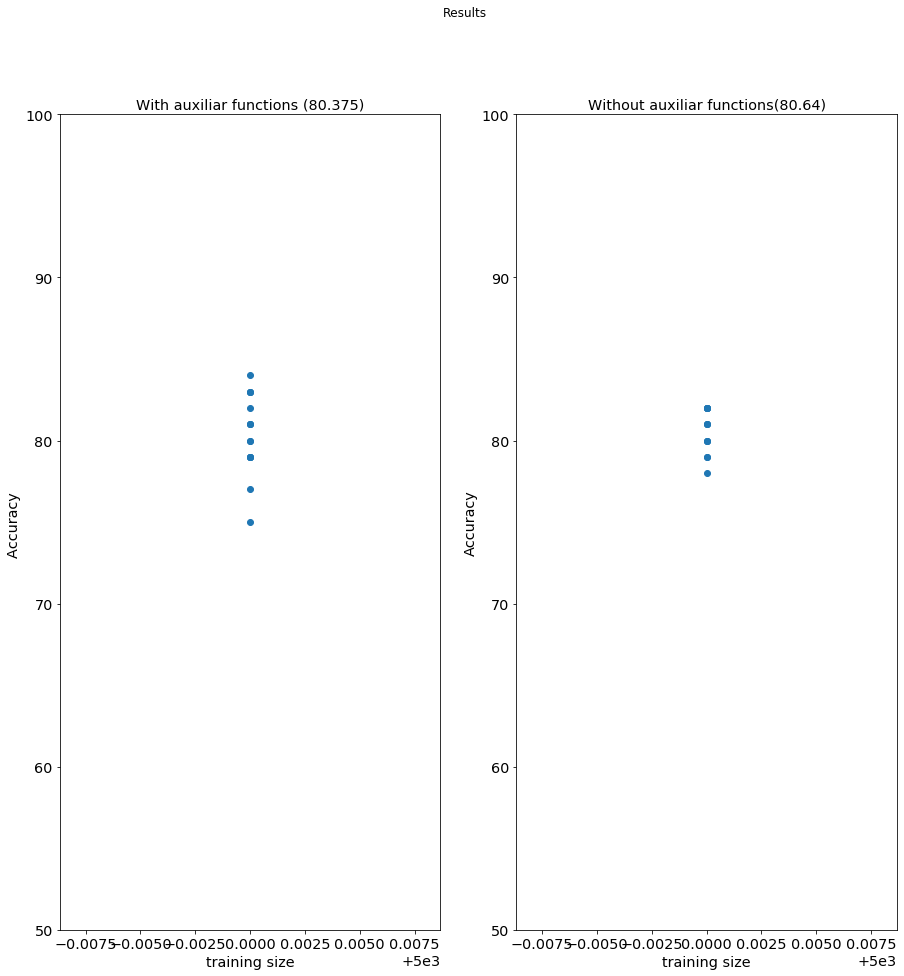

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.n, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.n, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

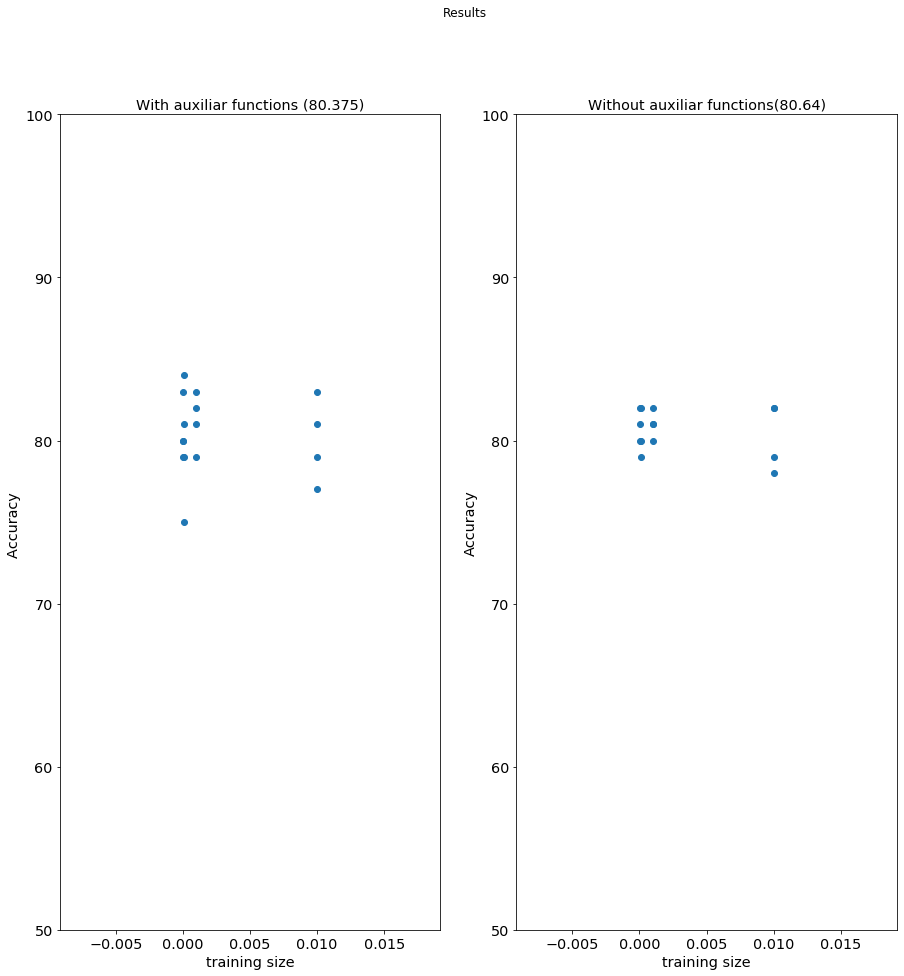

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.EPS1, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.EPS1, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

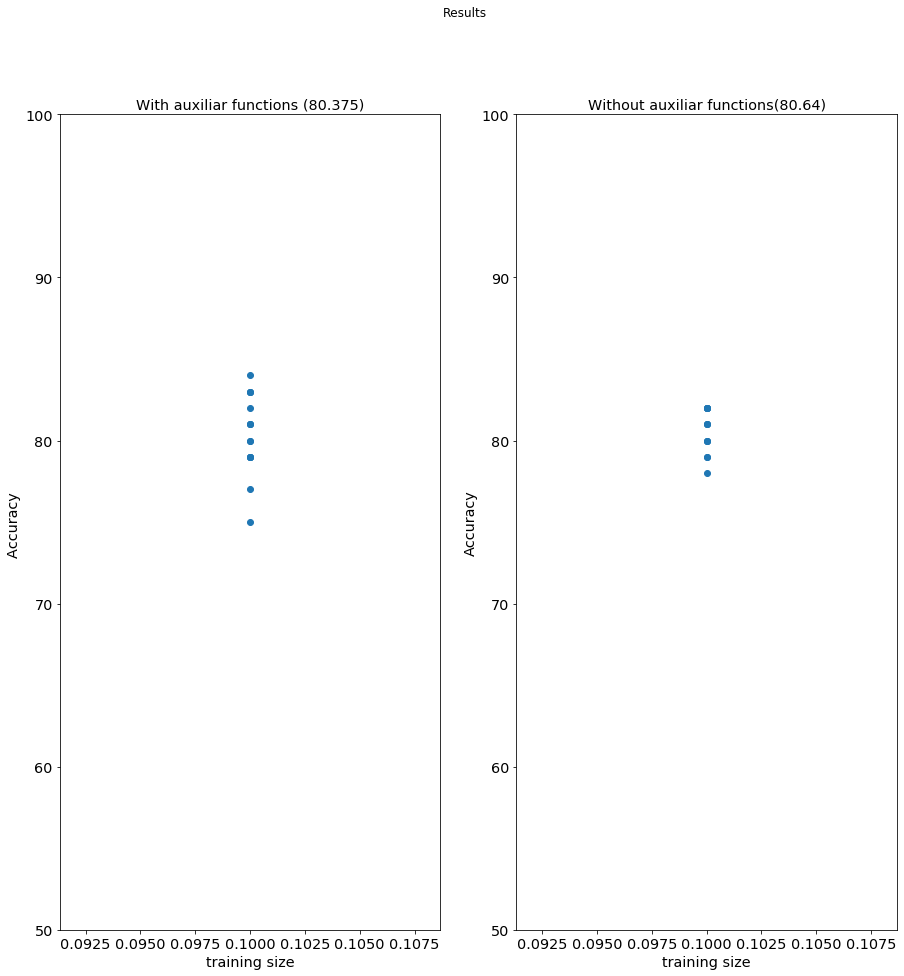

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [48]:
data_aux.epsilon.unique()

array([0.1])

In [49]:
data2 = pd.read_csv("06-04-2021-results.csv")

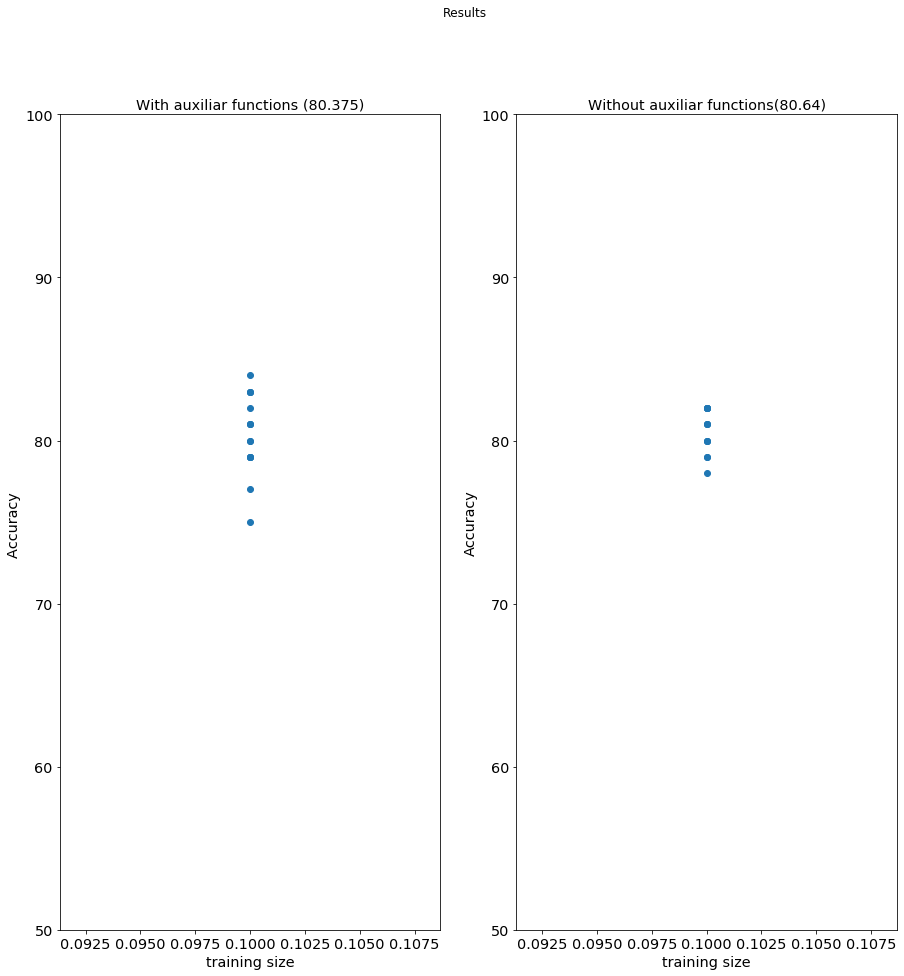

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5823: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


(1.6009849280375819,
 0.9015482215897133,
 0.0021890907748951093,
 7.134297062689321e-31)